In [1]:
from imageGAN import *
import matplotlib.pyplot as plt
import numpy
import os
from dataset_helper import *

In [2]:
dim = (256,256,3)
batchsize=64
epochs = 10
latentDim = 100
stride = 2
arch = [32,32,16,16,8]
arch_desc = [16,32,64,32,32]
opt = keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
model = "../models/skyline_gan_1"

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 2048)              206848    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 2048)              0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 16, 32)        9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 32)        92

In [ ]:
gen = Generator(dim,arch,latent_size=latentDim,stride=stride)
des = Discriminator(dim,arch_desc,stride=2)

In [3]:
gan = ImageGAN(gen,des,batchsize,opt)
gan.compile()#,run_eagerly=True)
gan.load_weights(model)

In [4]:
image = gan.generator.generateImages(1)

(1, 256, 256, 3)


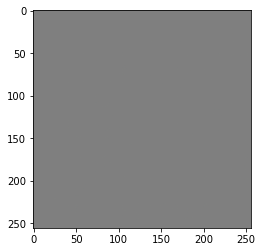

In [5]:
plt.imshow(image[0])

In [6]:
print(gan.discriminator.discriminator.predict(image))

[[0.4950654]]


In [7]:
names = ["../data/skyline_images/" + x for x in os.listdir("../data/skyline_images/") if ".jpg" in x][:1000]

In [8]:
tensor = getTrainingTensor(names,(256,256,3))

In [9]:
#print(gan.discriminator.discriminator(tensor[:1]))

In [10]:
data = getImageGenerator("../data/","skyline_images", dim, batchsize)
if __name__ == "__main__":
    gan.fit(data, epochs=1,batch_size=batchsize,)

Found 123121 images belonging to 1 classes.
  20/1924 [..............................] - ETA: 28:22 - des loss: 1.2967 - gen loss: 0.8225  

KeyboardInterrupt: 

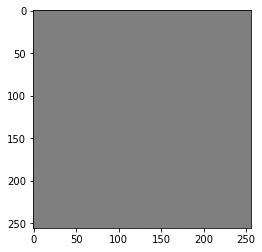

In [11]:
image = gan.generator.generateImages(1)

plt.imshow(image[0])

In [12]:
gan.save_weights("tmp")

In [13]:
gan.load_weights("tmp")